In [49]:
%run -i 'DStools.py'
import warnings 
warnings.simplefilter("error")
from PIL import Image


In [50]:
iris_df

,1,2,3,4,Cate,id
0,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,2
3,4.7,3.2,1.3,0.2,Iris-setosa,3
4,4.6,3.1,1.5,0.2,Iris-setosa,4
5,5.0,3.6,1.4,0.2,Iris-setosa,5
6,5.4,3.9,1.7,0.4,Iris-setosa,6
7,4.6,3.4,1.4,0.3,Iris-setosa,7
8,5.0,3.4,1.5,0.2,Iris-setosa,8
9,4.4,2.9,1.4,0.2,Iris-setosa,9


Select entries based on a combined condition shown in condition_dict

In [51]:
condition_dict={'Iris-setosa':0.4,'Iris-virginica':1.8}
combined_conditions_filter(condition_dict,iris_df,'Cate','4')

,1,2,3,4,Cate,id
0,,,,,,
6,5.4,3.9,1.7,0.4,Iris-setosa,6
16,5.7,4.4,1.5,0.4,Iris-setosa,16
17,5.4,3.9,1.3,0.4,Iris-setosa,17
22,5.1,3.7,1.5,0.4,Iris-setosa,22
27,5.0,3.4,1.6,0.4,Iris-setosa,27
32,5.4,3.4,1.5,0.4,Iris-setosa,32
45,5.1,3.8,1.9,0.4,Iris-setosa,45
104,6.3,2.9,5.6,1.8,Iris-virginica,104
108,7.3,2.9,6.3,1.8,Iris-virginica,108


Reorder feature based on correlationship. Highly correlated features are close to each other in the result.

In [65]:
generate_reordered_features(iris_df,['1','2','3','4'],[],True)

['2', '1', '3', '4']

1. Data frame is transformed into a matrix with selected columns and sorting by a certain column
2. The new matrix is scaled into a unit matrix, in which each row is summed into 1.

In [67]:
mx = dtm(iris_df,['1','2','3','4'],sort_column='Cate')
scaled_matrix = generate_unit_modules(mx, isrow=True, is_scale=True, simple_scale=True)
print(scaled_matrix[0].sum())

0.9999999999999999


1. Use decision tree to predict the label of iris data. The last printing is the overall accuracy and the standard deviation of accuracy
2. Use random forest to predict the label of iris data. The last printing is the overall accuracy and the standard deviation of accuracy

In [54]:
accuracy,full_wrong_list,full_test,full_predict,label_list = DT_RF_models(iris_df,['1','2','3','4'],'/home/ivan/data/temp/test/',isDT = True, iteration=5,testSize =0.1,readList = ['Cate','id'], label = 'Cate',DTdenotion='test',DT_maxdepth=2,numberOfTrees = 100,RF_maxdepth=6,isplot=False,id_column='id',handle_unbalance=True)
accuracy,full_wrong_list,full_test,full_predict,label_list = DT_RF_models(iris_df,['1','2','3','4'],'.temp/',isDT = False, iteration=5,testSize =0.1,readList = ['Cate','id'], label = 'Cate',DTdenotion='test',DT_maxdepth=2,numberOfTrees = 100,RF_maxdepth=6,isplot=False,id_column='id',handle_unbalance=True)


------------------accuracy = 0.9333333333333333------------------
------------------accuracy = 0.8666666666666667------------------
------------------accuracy = 0.8666666666666667------------------
------------------accuracy = 0.9333333333333333------------------
------------------accuracy = 0.9333333333333333------------------
0.9066666666666668 0.03265986323710904
------------------accuracy = 1.0------------------
------------------accuracy = 1.0------------------
------------------accuracy = 0.9333333333333333------------------
------------------accuracy = 1.0------------------
------------------accuracy = 0.8666666666666667------------------
0.9600000000000002 0.05333333333333332


The feature importance analysis. The result shows the feature '3' has positive affinity with 'Iris-virginica' and negative affinity with 'Iris-versicolor'. The larger the ability, the more powerful for distinguishing samples from different categories is.

In [55]:
full_feature_importance_RF_DF = generate_RF_feature_importance('.temp/',iris_df,['1','2','3','4'],'Cate')
transform_feature_importance(full_feature_importance_RF_DF,label_list) 

,Features,Iris-setosa,Iris-versicolor,Iris-virginica,Sample Size,Ability
2,3,-0.051,-0.420,0.529,14419.0,29.346624
3,4,-0.062,-0.398,0.540,14109.0,28.423452
0,1,-0.215,0.275,0.510,5280.0,16.955324
1,2,0.131,0.478,-0.391,1539.0,16.706156


Plot the ROC plot

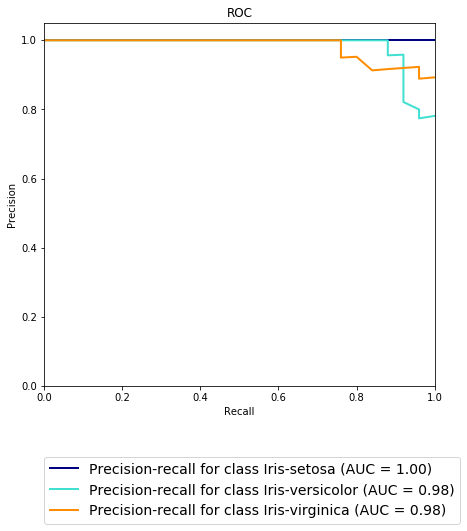

In [56]:

plot_precision_recall_curve(full_test,full_predict,label_list,class_num=3,title='ROC') 


Print the recall and precision for each category

In [57]:
print_precision_recall_accuracy(full_test,full_predict,label_list,class_num=3)

Overall Accuray:  0.96
Iris-setosa label size: 25
Iris-setosa Recall:  1.0
Iris-setosa Precision:  1.0
Iris-versicolor label size: 25
Iris-versicolor Recall:  0.88
Iris-versicolor Precision:  1.0
Iris-virginica label size: 25
Iris-virginica Recall:  1.0
Iris-virginica Precision:  0.8928571428571429


Print the details of incorrect predictions

In [58]:
print_full_wrong_list(full_wrong_list)

Pre-Label: Iris-virginica   Original_data: Iris-versicolor---84---Iris-versicolor  Probability: [0.   0.09 0.91]
Pre-Label: Iris-virginica   Original_data: Iris-versicolor---73---Iris-versicolor  Probability: [0.         0.42569444 0.57430556]
Pre-Label: Iris-virginica   Original_data: Iris-versicolor---71---Iris-versicolor  Probability: [0.   0.07 0.93]


Use combined xgboost models to make predictions and show the output.

In [59]:
training_X,testing_X,training_Y,testing_Y = cross_validation_split_with_unbalance_data(iris_df,['1','2','3','4'],label='Cate',id_column='id',test_size=0.2,handle_unbalance=True)
training_X['Cate']=training_Y
testing_X['Cate']=testing_Y
df_result = combined_eXGBT_classifier(training_set = training_X,numeric_features_validation = ['1','2','3','4'],testing_set = testing_X,label_column = 'Cate',max_depth=2,num_class=3,num_trees=50)
full_result,clean_result = transform_predict_result_DF(predict_result_DF =df_result, label_col='Cate', threshold=0.1)
full_result

,1,2,3,4,Cate,Iris-virginica,Iris-versicolor,Iris-setosa,multi_eXGBT_pre_lable,predict_result_DF_indices,probability,F_label
49,5.3,3.7,1.5,0.2,Iris-setosa,0.045455,0.111111,0.846154,Iris-setosa,49,0.846154,Iris-setosa
25,4.8,3.4,1.9,0.2,Iris-setosa,0.045455,0.062500,0.846154,Iris-setosa,25,0.846154,Iris-setosa
39,4.4,3.0,1.3,0.2,Iris-setosa,0.045455,0.062500,0.846154,Iris-setosa,39,0.846154,Iris-setosa
15,5.8,4.0,1.2,0.2,Iris-setosa,0.045455,0.200000,0.846154,Iris-setosa,15,0.846154,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa,0.045455,0.062500,0.846154,Iris-setosa,10,0.846154,Iris-setosa
14,4.3,3.0,1.1,0.1,Iris-setosa,0.045455,0.062500,0.846154,Iris-setosa,14,0.846154,Iris-setosa
34,5.5,4.2,1.4,0.2,Iris-setosa,0.045455,0.125000,0.846154,Iris-setosa,34,0.846154,Iris-setosa
44,5.0,3.5,1.6,0.6,Iris-setosa,0.045455,0.062500,0.846154,Iris-setosa,44,0.846154,Iris-setosa
12,4.8,3.4,1.6,0.2,Iris-setosa,0.045455,0.062500,0.846154,Iris-setosa,12,0.846154,Iris-setosa
21,5.4,3.4,1.7,0.2,Iris-setosa,0.045455,0.111111,0.846154,Iris-setosa,21,0.846154,Iris-setosa


Plot heatmap for each cluster of K-means by Bokeh

In [60]:
plot_heatmap_for_kmeans_groups(data_frame=iris_df,numeric_features=['1','2','3','4'],path='.temp', clusters=3, is_row=True)

The plots generated by boken are html files. In order to show the plots, I transformed them into png file and showed in jupyter notebook

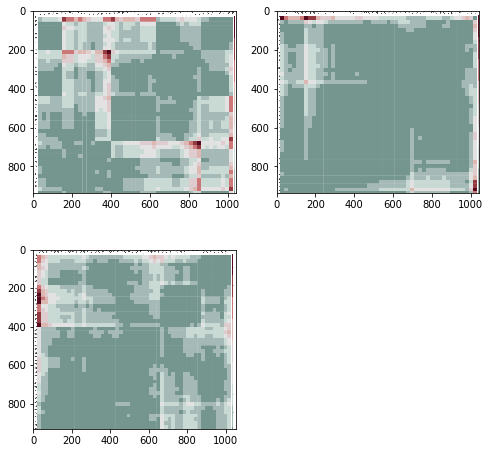

In [61]:
fig=plt.figure(figsize=(8, 8))
img1 = Image.open('materials/cluster1.png')
fig.add_subplot(2, 2, 1)
plt.imshow(img1)
img2 = Image.open('materials/cluster2.png')
fig.add_subplot(2, 2, 2)
plt.imshow(img2)
img3 = Image.open('materials/cluster3.png')
fig.add_subplot(2, 2, 3)
plt.imshow(img3)

tSNE plot with bokeh embedded.

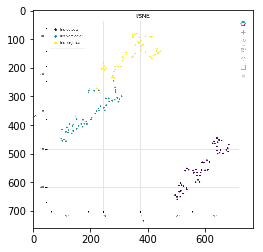

In [62]:
tsne_df = tSNEPlot(iris_df,['1','2','3','4'],['Cate','id'],'Cate','.temp/tsn.html',size_col = 5, iters=2000, perp=8, title='tSNE',num_components=2)
img1 = Image.open('materials/tsne.png')
plt.imshow(img1)

A novel visualisation method used for dataset with 100 to 1000 features. 4 examples are shown below:

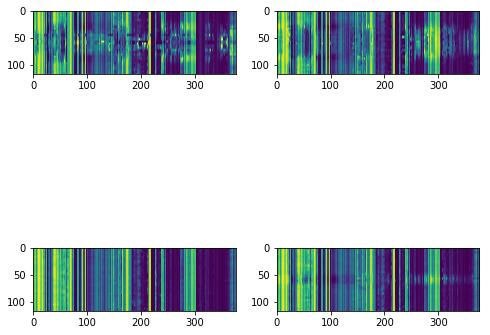

In [63]:
plot_colorful_images_wrapper(megadata_validation, megadata_validation, megadata_validation, numeric_features_validation, 'sepcom', 2, 0, '.temp', simple_scale=True, generate_reordered_indices=generate_levels_reordered_megadata_DF)
fig=plt.figure(figsize=(8, 8))
img1 = Image.open('.temp/layer1_1Mitomycin C.png')
fig.add_subplot(2, 2, 1)
plt.imshow(img1)
img2 = Image.open('.temp/layer1_86Cytarabine.png')
fig.add_subplot(2, 2, 2)
plt.imshow(img2)
img3 = Image.open('.temp/layer1_440Sucrose.png')
fig.add_subplot(2, 2, 3)
plt.imshow(img3)
img4 = Image.open('.temp/layer1_447Temozolomide.png')
fig.add_subplot(2, 2, 4)
plt.imshow(img4)